In [1]:
## This file is part of the "LineIntegralConvolution" project.
## Copyright (c) 2025 Neco Kriel.
## Licensed under the MIT License. See LICENSE for details.

In [ ]:
## ###############################################################
## DEPENDENCIES
## ###############################################################

import sys
print("Using Python env:", sys.executable)

import time
import matplotlib.pyplot as mpl_plot
from pathlib import Path
from vegtamr.lic import compute_lic_with_postprocessing
from vegtamr.utils import vfields, plots


Using Python env: /Users/necoturb/Documents/Codes/Asgard/sindri/python/submodules/vegtamr/.venv/bin/python
Finished importing.


In [3]:
## ###############################################################
## MAIN PROGRAM
## ###############################################################

num_pixels   = 500
vfield_dict  = vfields.vfield_lotka_volterra(size=num_pixels)
vfield       = vfield_dict["vfield"]
streamlength = vfield_dict["streamlength"]
bounds_rows  = vfield_dict["bounds_rows"]
bounds_cols  = vfield_dict["bounds_cols"]
vfield_name  = vfield_dict["name"]
print("Computing LIC...")
## apply the LIC multiple times: equivelant to applying several passes with a paint brush.
## note: `backend` options include "python" (this project) or "rust" (10x faster; https://github.com/tlorach/rLIC)
start_time = time.perf_counter()
sfield = compute_lic_with_postprocessing(
    vfield          = vfield,
    streamlength    = streamlength,
    use_filter      = True,
    filter_sigma    = 5e-2 * num_pixels, # approx width of LIC tubes
    use_equalize    = True,
    backend         = "python",
)
elapsed_time = time.perf_counter() - start_time
print(f"LIC execution took {elapsed_time:.3f} seconds.")

Computing LIC...
Using the native `python` backend. This is slower but more accurate than to the `rust` backend.
LIC execution took 91.498 seconds.


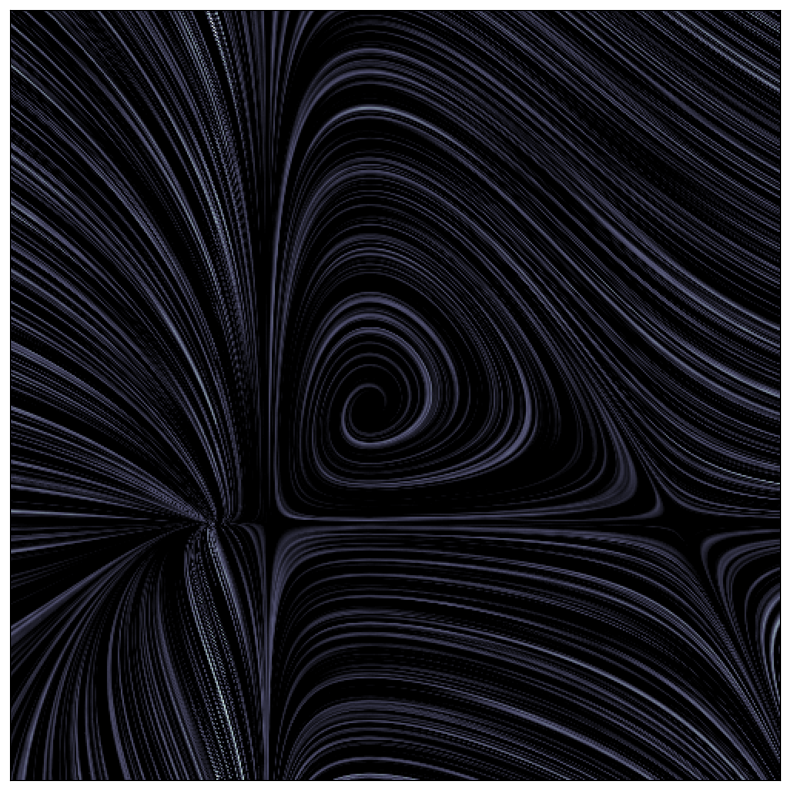

In [4]:
fig, ax = mpl_plot.subplots(figsize=(10,10))
plots.plot_lic(
    ax                  = ax,
    sfield              = sfield,
    vfield              = vfield,
    bounds_rows         = bounds_rows,
    bounds_cols         = bounds_cols,
    overlay_streamlines = False,
)